In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

# Exploratory Data Analyses - EDA - Intercement data

## Reading the dataset

In [2]:
xls = pd.ExcelFile(
    "../../../data/raw/Intercement/estudo.xlsm", engine="openpyxl"
)
df = pd.read_excel(xls, "dados", parse_dates=["Data"])

df_2018_2019 = pd.read_excel(
    "../../../data/raw/Intercement/Dados_CAJ_2018_19.xlsx",
    engine="openpyxl",
    parse_dates=["Data"],
)

## Initial Preprocessing

In [3]:
# 2008-2017
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df[~df.isna().all(axis=1)]
df = df.rename({"G75�": "G75", "G44�": "G44"}, axis=1)

# 2018-2019
df_2018_2019 = df_2018_2019.rename({"G75�": "G75", "G44�": "G44"}, axis=1)
df = pd.concat([df, df_2018_2019]).reset_index(drop=True)

df = df[df["COD_PROD"] ==  "CPIIF40"].reset_index(drop=True)

## Exploratory data Analysis

In [4]:
df.shape

(1794, 40)

In [5]:
df.head()

,Data,RIC,RIC_OBS,Nat,Nat1,Lp,Ec,Lc,RIE,RIE_OBS,...,MGO,SIO2,FE2O3,SO3,NA2O,P2O5,EXP,RC1,RC91,CO2
0,2012-06-14,0418B,NaN,AC,NaN,-,CAJ,-,0418B,NaN,...,6.42,16.09,3.39,2.91,NaN,0.80,NaN,15.7,NaN,NaN
1,2012-06-15,0420B,NaN,AC,NaN,-,CAJ,-,0420B,NaN,...,6.44,16.14,3.40,2.92,NaN,0.81,NaN,15.9,NaN,NaN
2,2012-06-18,0447B,NaN,AC,NaN,-,CAJ,-,0447B,NaN,...,6.33,15.84,3.38,2.85,NaN,0.87,1.0,16.0,NaN,NaN
3,2012-06-19,0449B,NaN,AC,NaN,-,CAJ,-,0449B,NaN,...,6.32,15.94,3.39,2.84,NaN,0.90,NaN,13.7,NaN,NaN
4,2012-06-20,0451B,NaN,AC,NaN,-,CAJ,-,0451B,NaN,...,6.35,15.88,3.40,2.83,NaN,0.92,NaN,16.6,NaN,NaN


In [6]:
df.tail()

,Data,RIC,RIC_OBS,Nat,Nat1,Lp,Ec,Lc,RIE,RIE_OBS,...,MGO,SIO2,FE2O3,SO3,NA2O,P2O5,EXP,RC1,RC91,CO2
1789,2019-07-24,8114B,NaN,AC,NaN,-,CAJ,-,8114B,NaN,...,6.20,16.21,3.79,2.96,NaN,0.86,NaN,12.0,NaN,NaN
1790,2019-07-26,8115B,NaN,AC,NaN,-,CAJ,-,8115B,NaN,...,6.19,16.44,3.86,2.83,NaN,0.86,NaN,12.4,NaN,NaN
1791,2019-07-29,8146B,NaN,AC,NaN,-,CAJ,-,8146B,NaN,...,5.70,16.86,3.90,2.69,NaN,0.99,NaN,13.0,NaN,NaN
1792,2019-07-30,8147B,NaN,AC,NaN,-,CAJ,-,8147B,NaN,...,6.09,16.25,3.87,2.69,NaN,0.99,NaN,13.6,NaN,NaN
1793,2019-07-31,8150B,NaN,AC,NaN,-,CAJ,-,8150B,NaN,...,5.81,17.36,3.91,2.99,NaN,0.93,NaN,11.2,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          1794 non-null   datetime64[ns]
 1   RIC           1794 non-null   object        
 2   RIC_OBS       0 non-null      float64       
 3   Nat           1794 non-null   object        
 4   Nat1          2 non-null      object        
 5   Lp            1794 non-null   object        
 6   Ec            1794 non-null   object        
 7   Lc            1794 non-null   object        
 8   RIE           1794 non-null   object        
 9   RIE_OBS       0 non-null      float64       
 10  Rept          0 non-null      float64       
 11  COD_MN        1794 non-null   object        
 12  COD_ENT       1794 non-null   object        
 13  COD_PROD      1794 non-null   object        
 14  COD_VAR_PROD  1787 non-null   object        
 15  AGP           1791 non-null   float64 

<h2>1. Structure Investigation</h2>

In [8]:
df.dtypes.value_counts()

float64           28
object            11
datetime64[ns]     1
dtype: int64

<h3>1.1 Structure of numerical features</h3>

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RIC_OBS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIE_OBS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rept,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGP,1791.0,30.329425,0.967124,26.60,29.80,30.400,31.0000,38.80
IP,1794.0,197.034002,23.311931,105.00,180.00,195.000,210.0000,285.00
FP,1789.0,266.856344,27.033516,180.00,250.00,265.000,285.0000,390.00
G75,1783.0,0.084532,0.066106,0.00,0.04,0.100,0.1000,1.80
G44,1761.0,0.589228,0.184464,0.03,0.48,0.600,0.7000,3.18
MVOL,874.0,3.101453,0.070425,1.13,3.09,3.100,3.1200,3.17
SBL,1789.0,4870.642817,271.512419,3840.00,4700.00,4890.000,5060.0000,5910.00


<h3>1.2 Structure of Non-Numeric features</h3>

In [10]:
df.describe(exclude='number').T

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last
Data,1794,1740,2014-03-24 00:00:00,6,2012-06-14,2019-12-07
RIC,1794,1794,5477B,1,NaT,NaT
Nat,1794,3,AC,1755,NaT,NaT
Nat1,2,1,AB,2,NaT,NaT
Lp,1794,3,-,1739,NaT,NaT
Ec,1794,1,CAJ,1794,NaT,NaT
Lc,1794,4,-,1729,NaT,NaT
RIE,1794,1794,5477B,1,NaT,NaT
COD_MN,1794,1,CEMBRCAJ,1794,NaT,NaT
COD_ENT,1794,1,CAJ,1794,NaT,NaT


In [11]:
df["COD_PROD"].unique()

array(['CPIIF40'], dtype=object)

In [12]:
dates = df["Data"]

In [13]:
print(dates.min())
print(dates.max())

2012-06-14 00:00:00
2019-12-07 00:00:00


In [14]:
dates

0      2012-06-14
1      2012-06-15
2      2012-06-18
3      2012-06-19
4      2012-06-20
          ...    
1789   2019-07-24
1790   2019-07-26
1791   2019-07-29
1792   2019-07-30
1793   2019-07-31
Name: Data, Length: 1794, dtype: datetime64[ns]

In [15]:
for column in df.dtypes[df.dtypes == object].keys():
    print(column, df[column].unique())


RIC ['0418B' '0420B' '0447B' ... '8146B' '8147B' '8150B']
Nat ['AC' 'FA' 'AB']
Nat1 [nan 'AB']
Lp ['-' '--' 'CIP']
Ec ['CAJ']
Lc ['-' '--' 1 'CIP']
RIE ['0418B' '0420B' '0447B' ... '8146B' '8147B' '8150B']
COD_MN ['CEMBRCAJ']
COD_ENT ['CAJ']
COD_PROD ['CPIIF40']
COD_VAR_PROD ['GRA' nan 'SAC']


<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

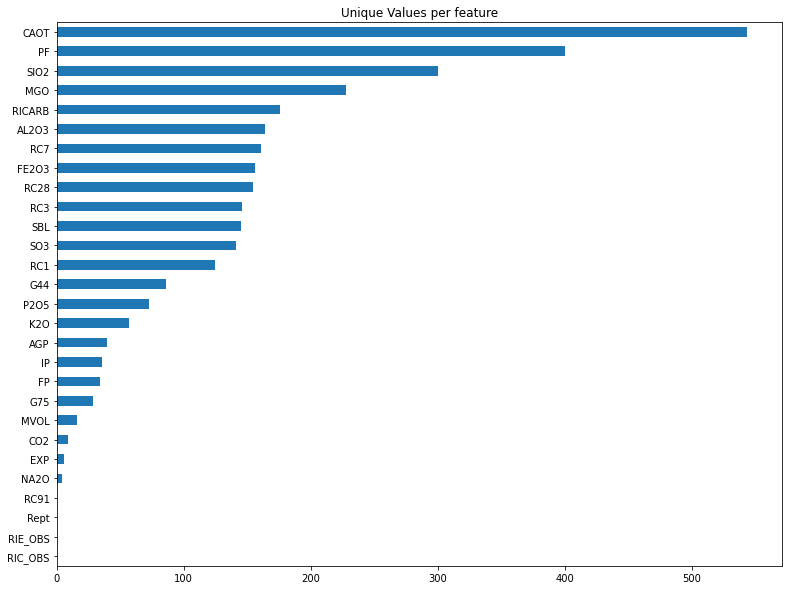

In [16]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Nat1'),
  Text(1, 0, 'Ec'),
  Text(2, 0, 'COD_MN'),
  Text(3, 0, 'COD_ENT'),
  Text(4, 0, 'COD_PROD'),
  Text(5, 0, 'COD_VAR_PROD'),
  Text(6, 0, 'Nat'),
  Text(7, 0, 'Lp'),
  Text(8, 0, 'Lc'),
  Text(9, 0, 'Data'),
  Text(10, 0, 'RIC'),
  Text(11, 0, 'RIE')])

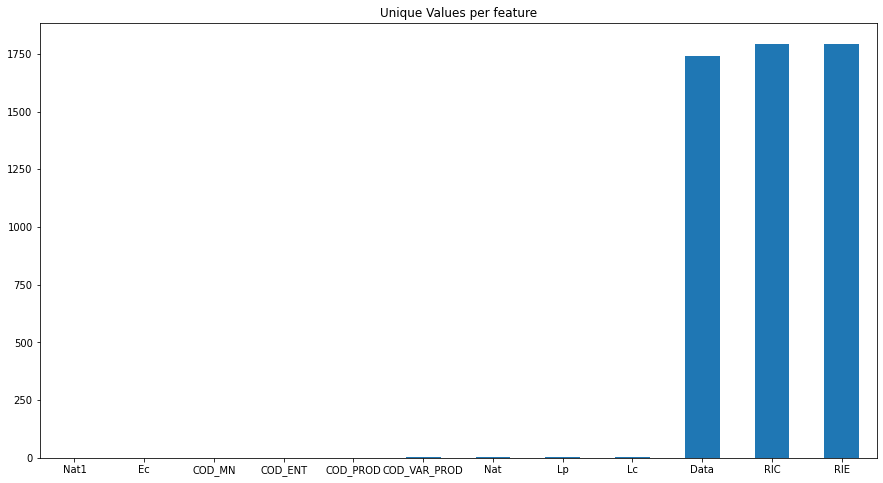

In [17]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [18]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 29 variables with missing values from a total of 40


In [19]:
df.isna().any().sort_values()

Data            False
IP              False
COD_PROD        False
COD_ENT         False
RIE             False
Lc              False
COD_MN          False
Lp              False
Nat             False
RIC             False
Ec              False
AL2O3            True
CAOT             True
K2O              True
MGO              True
SIO2             True
FE2O3            True
RC1              True
PF               True
NA2O             True
P2O5             True
EXP              True
SO3              True
RICARB           True
G44              True
RC7              True
RC3              True
SBL              True
MVOL             True
RC91             True
G75              True
FP               True
AGP              True
COD_VAR_PROD     True
Rept             True
RIE_OBS          True
Nat1             True
RIC_OBS          True
RC28             True
CO2              True
dtype: bool

In [20]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
RIC_OBS,1794
RIE_OBS,1794
Rept,1794
RC91,1794
Nat1,1792
NA2O,1790
CO2,1785
EXP,1411
MVOL,920
RICARB,605


In [21]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  15774 missing values.


/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

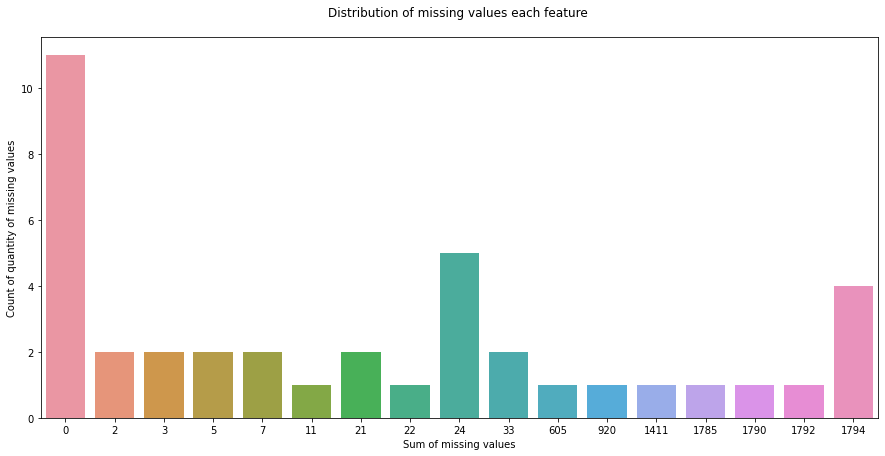

In [22]:
plt.figure(figsize=(15, 7))
sns.countplot(df.isna().sum())
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 40 artists>

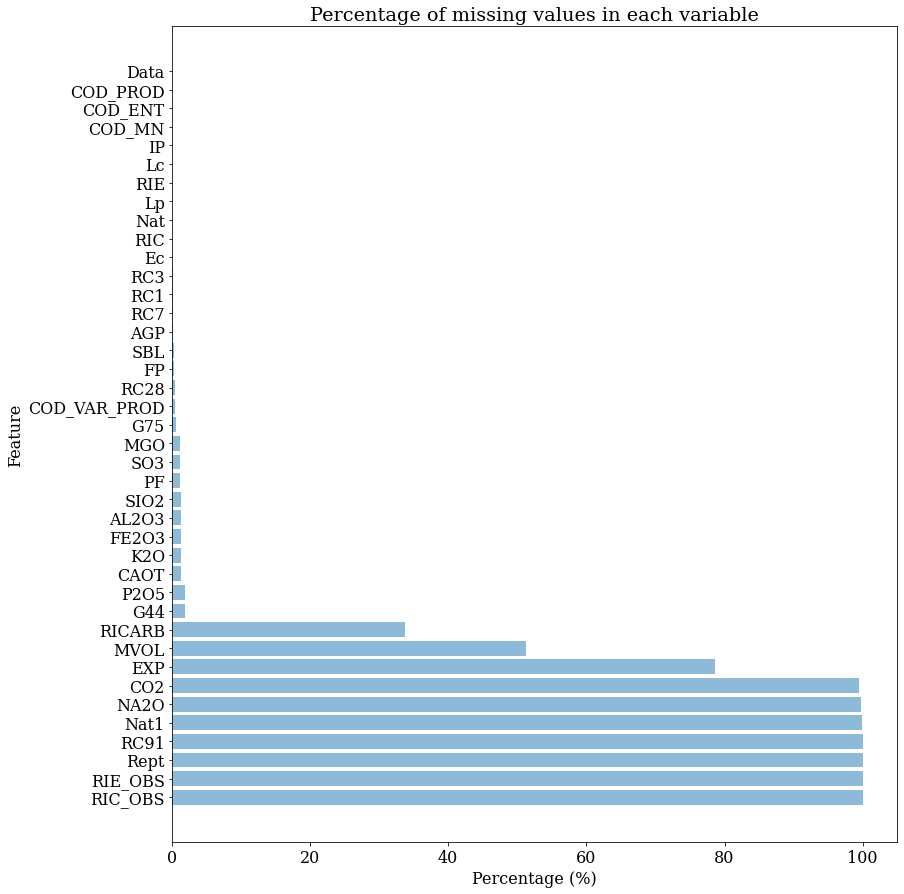

In [23]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [24]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
RIC_OBS,100.000000
RIE_OBS,100.000000
Rept,100.000000
RC91,100.000000
Nat1,99.888517
NA2O,99.777035
CO2,99.498328
EXP,78.651059
MVOL,51.282051
RICARB,33.723523


<BarContainer object of 40 artists>

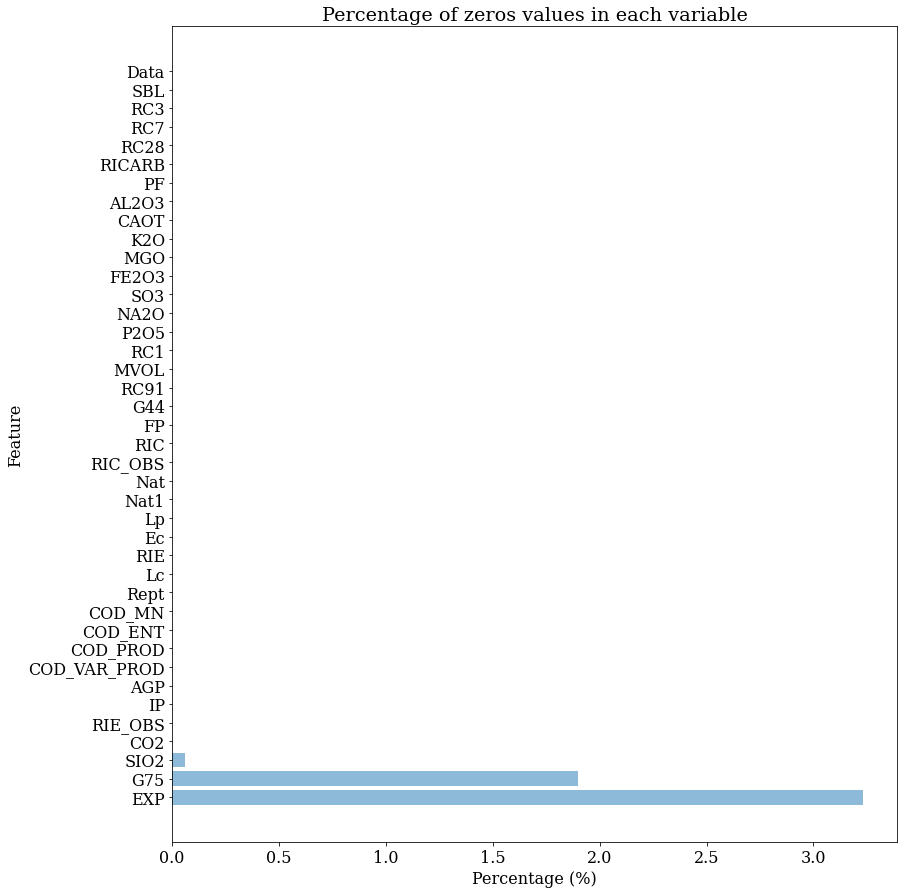

In [25]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [26]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [27]:
n_duplicates = (
    df.drop(["Data"], axis=1)
    .duplicated()
    .sum()
)
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

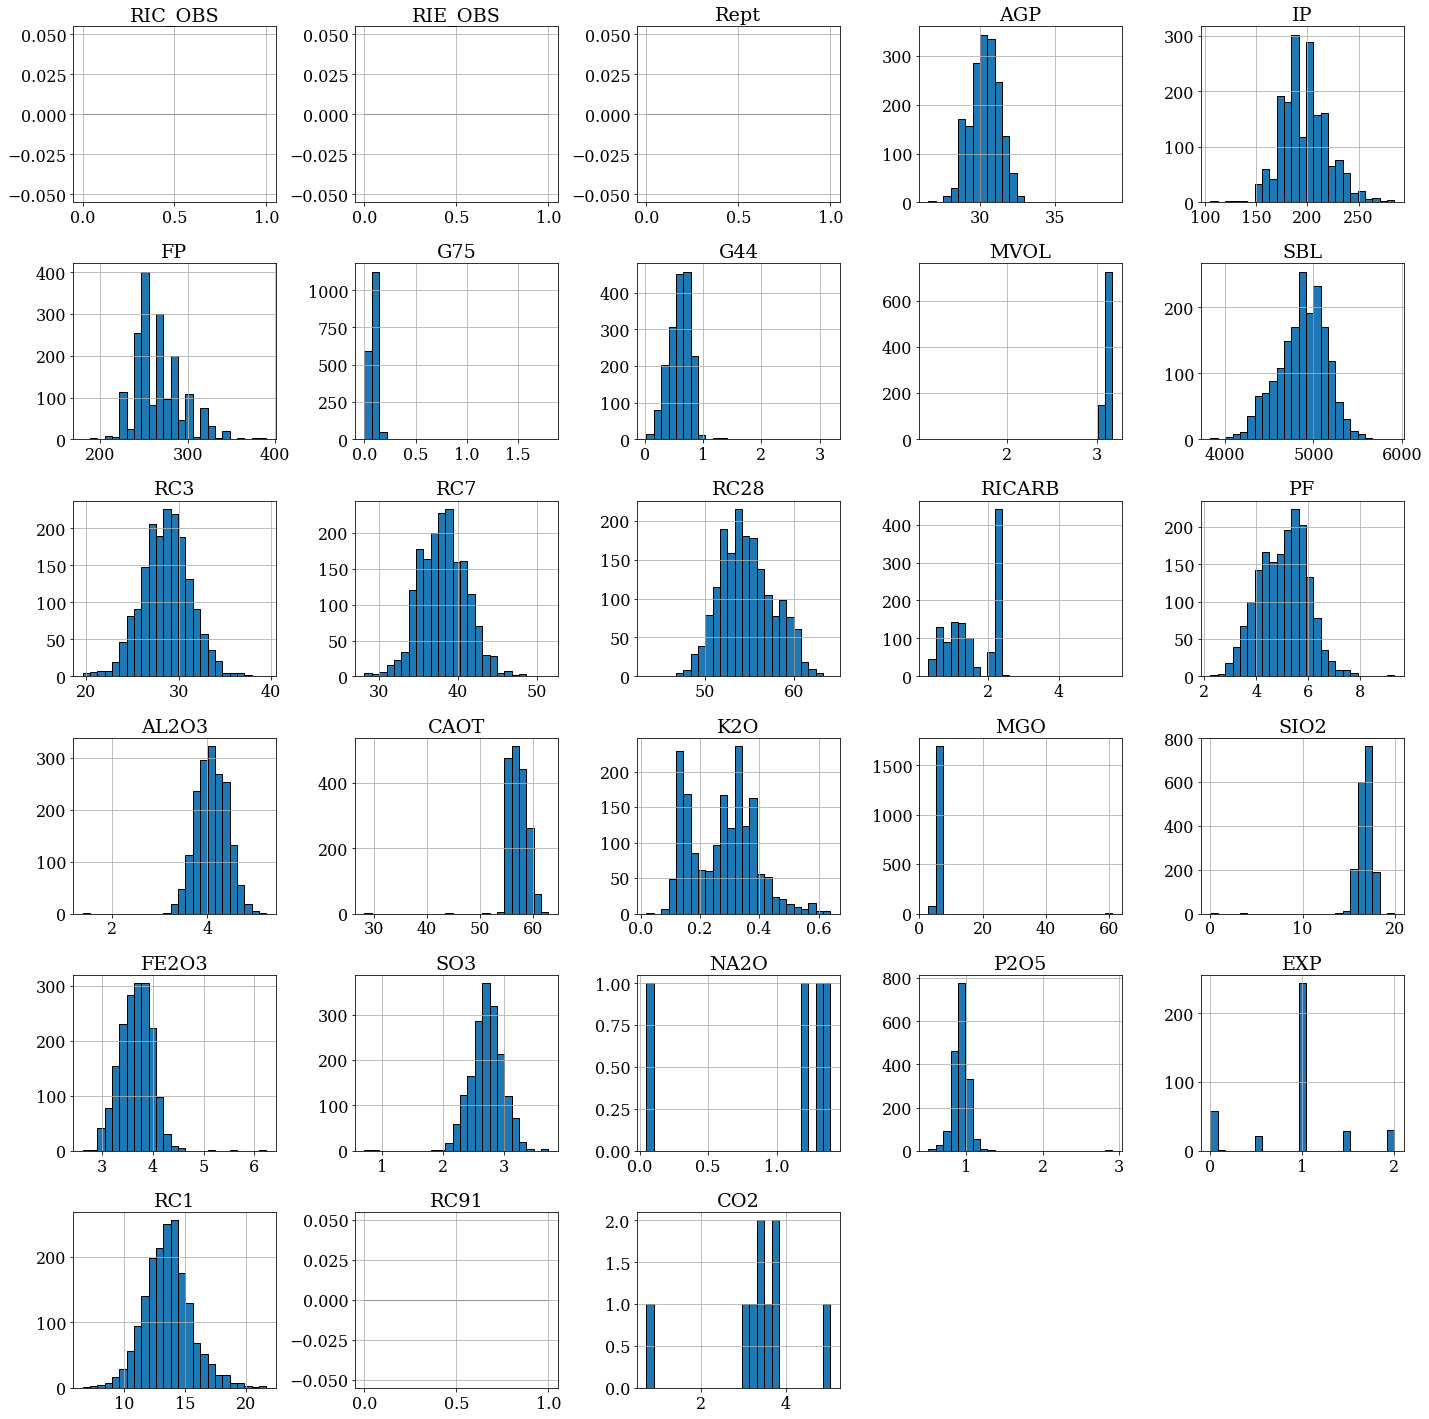

In [28]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

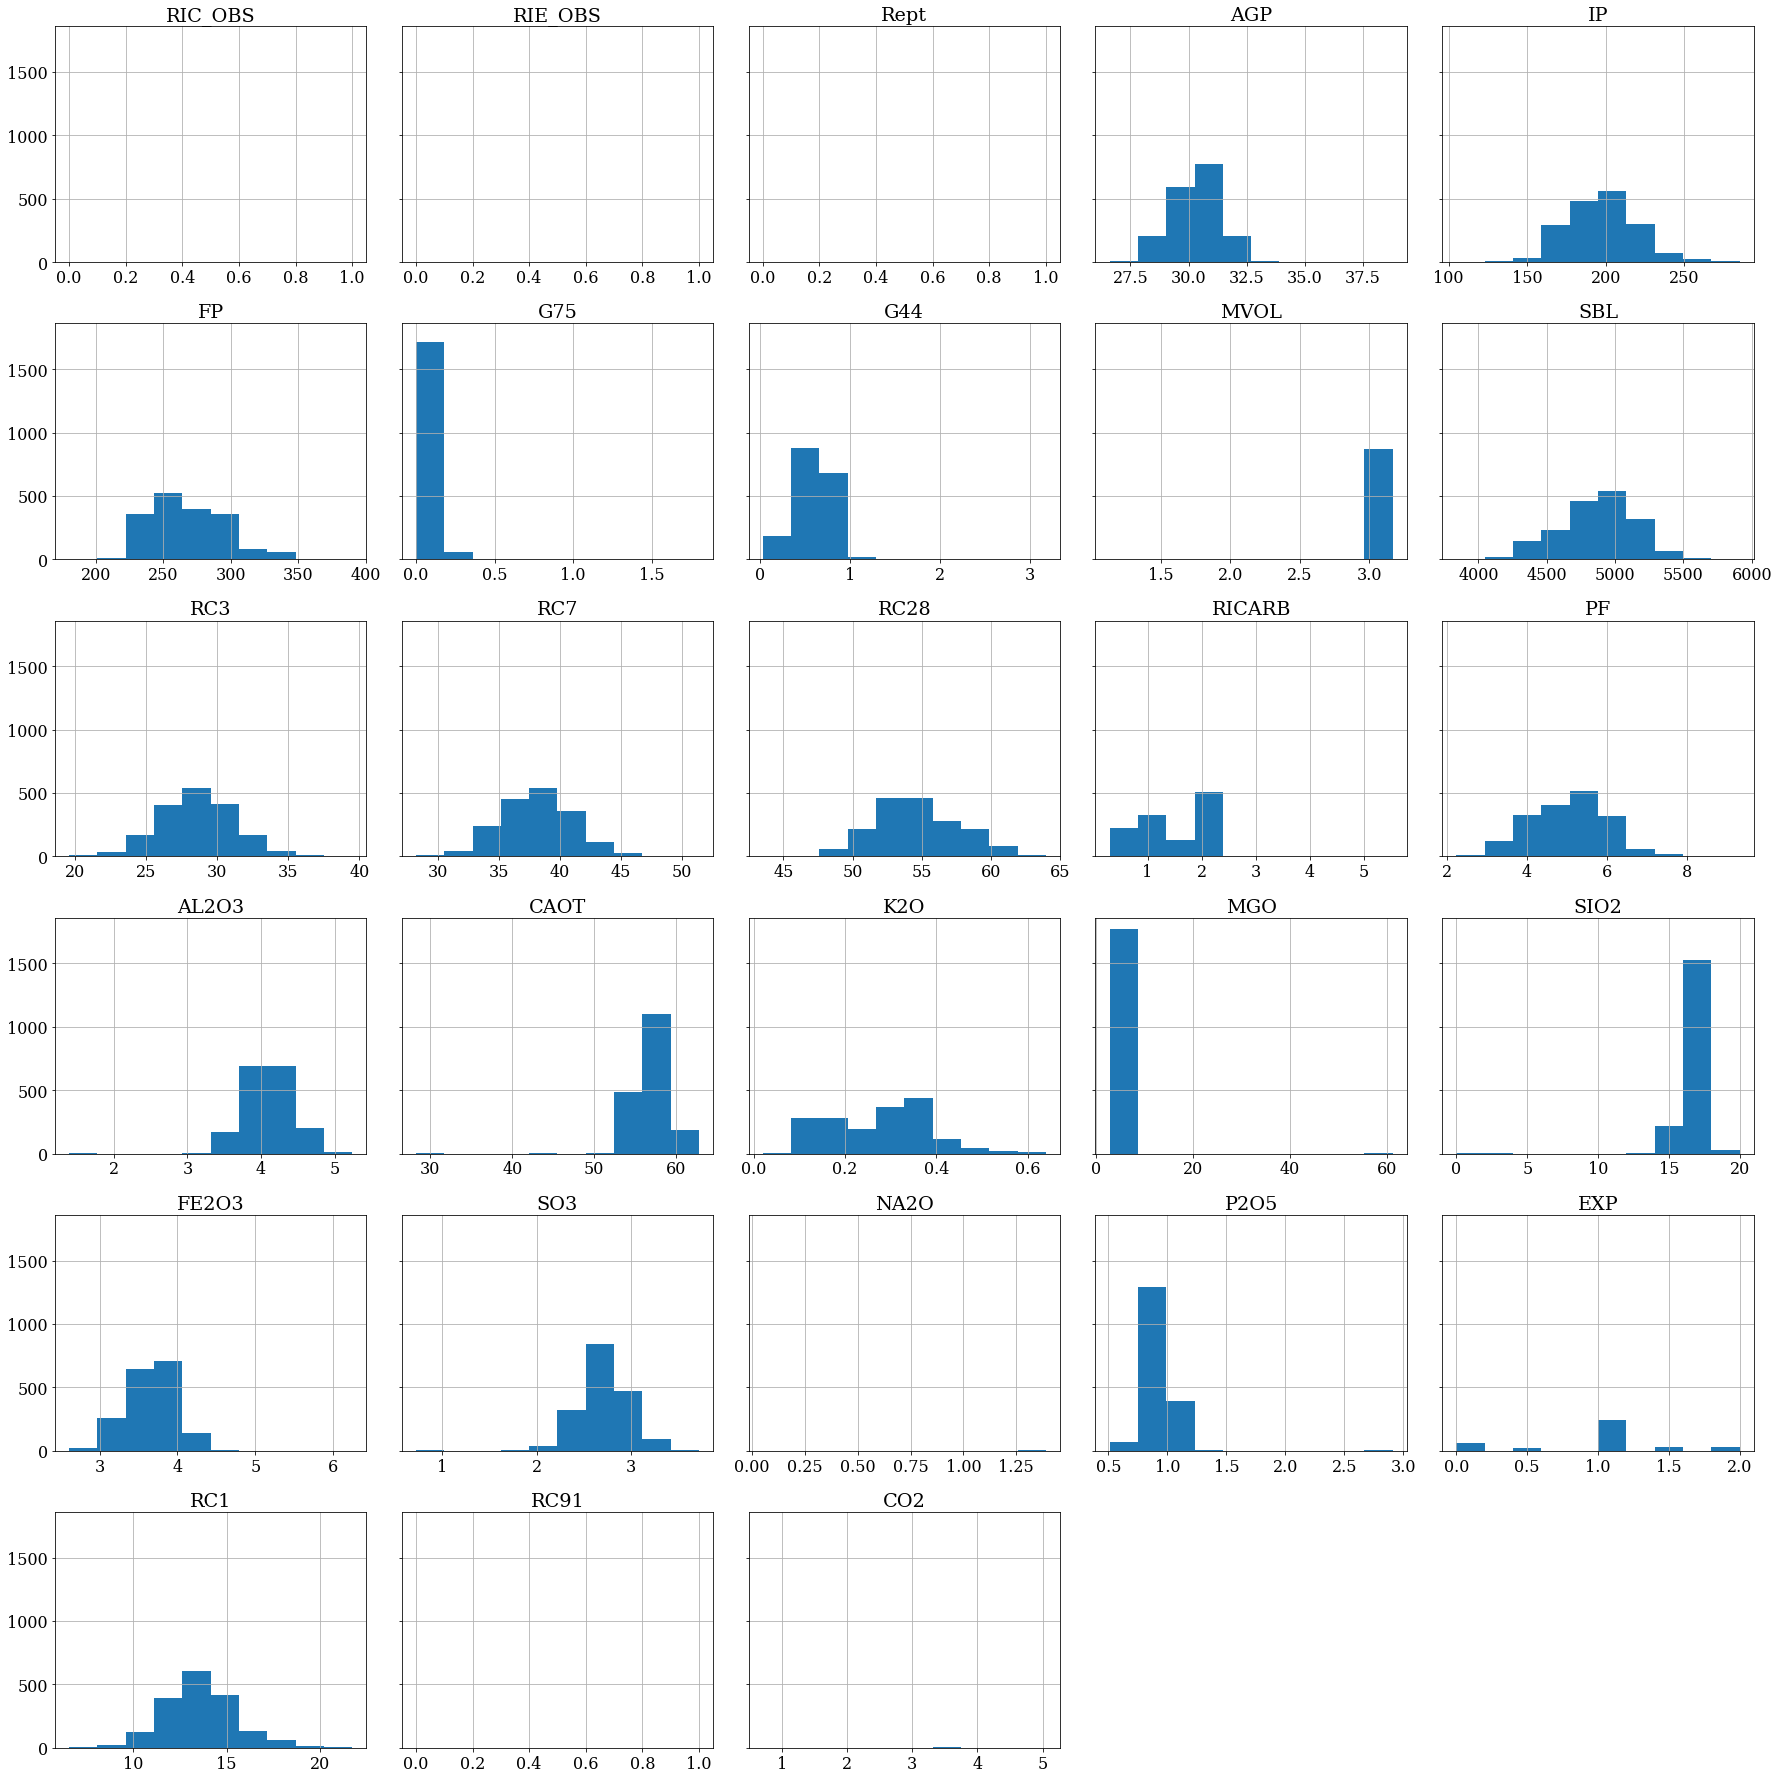

In [29]:
df.select_dtypes(include='float64').hist(figsize=(25, 25), sharey=True);
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

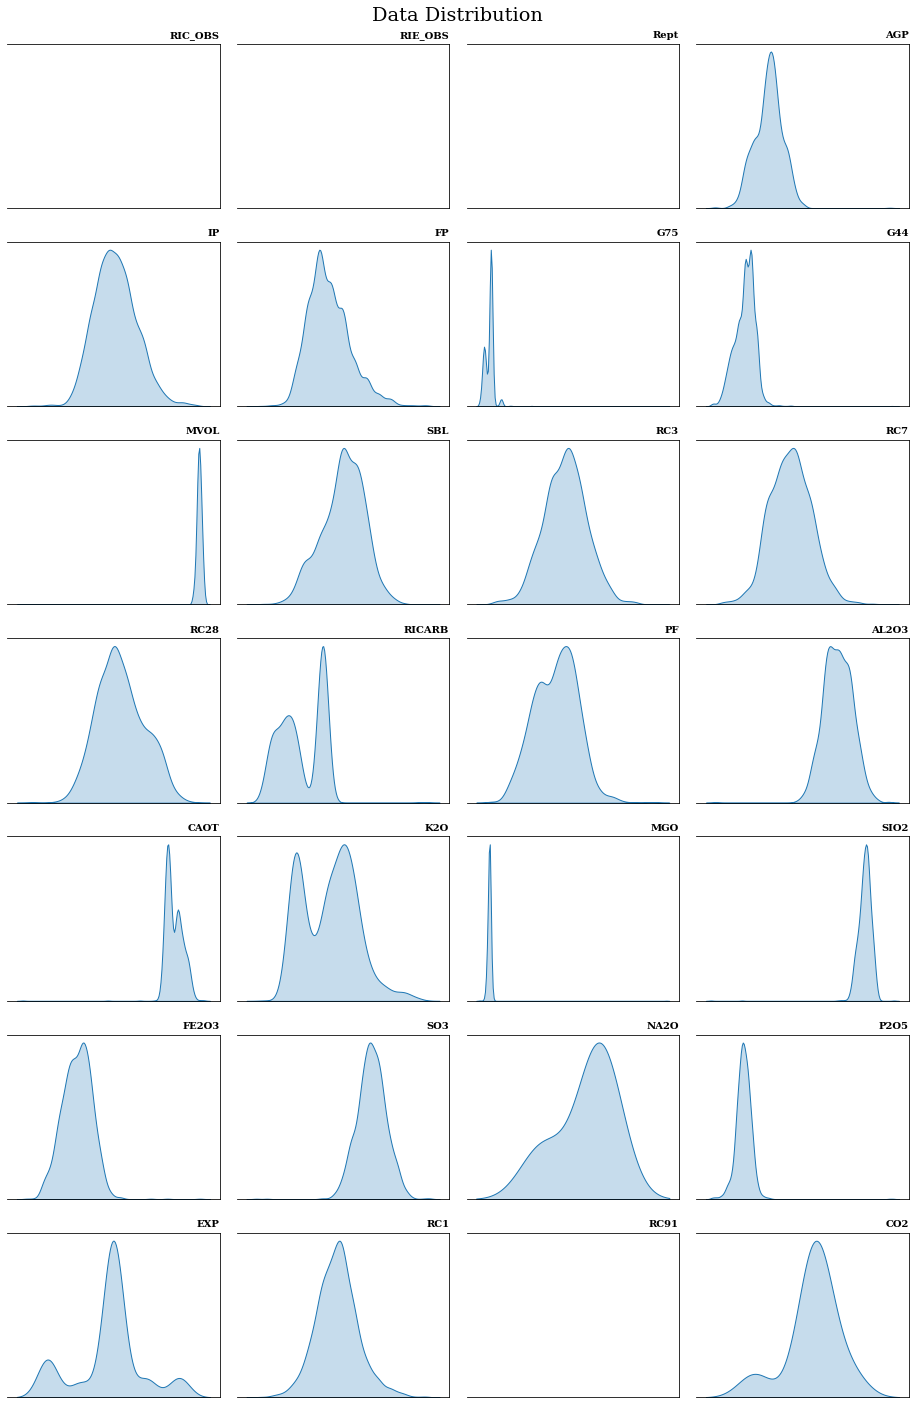

In [30]:
fig, axes = plt.subplots(7, 4, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

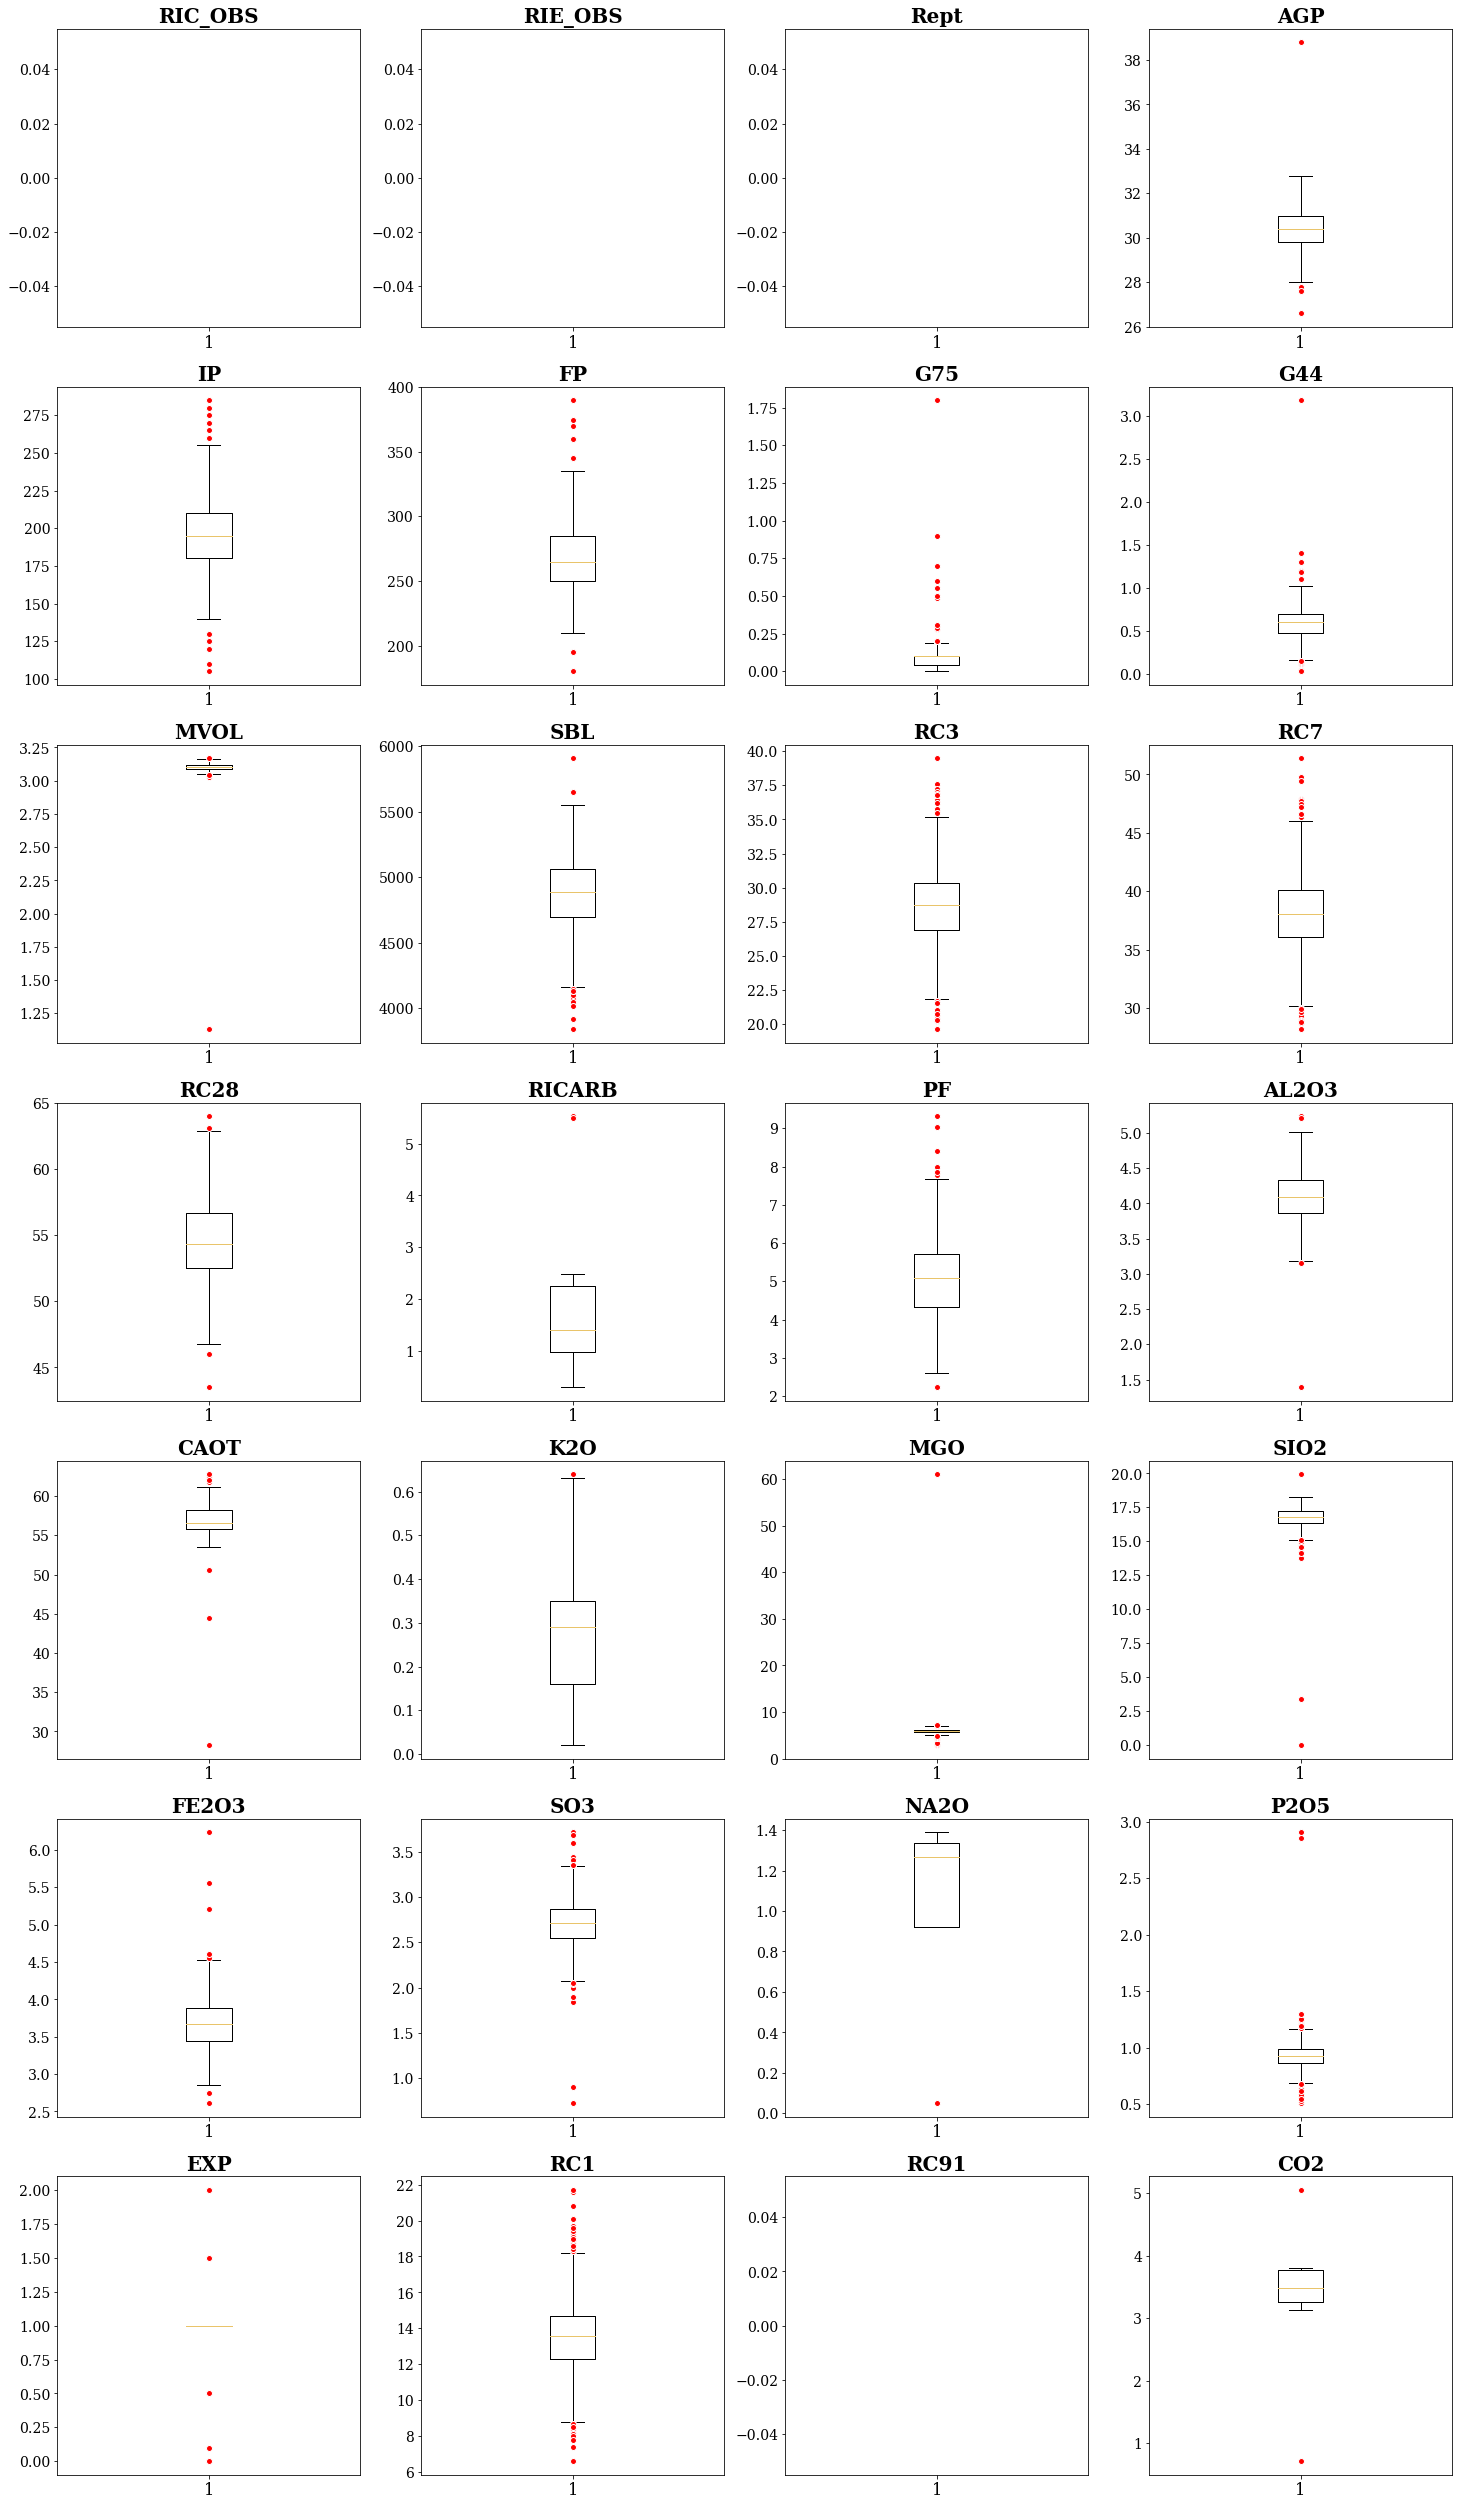

In [31]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(7, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

<h3>3.3. Feature Relationship</h3>

<AxesSubplot:>

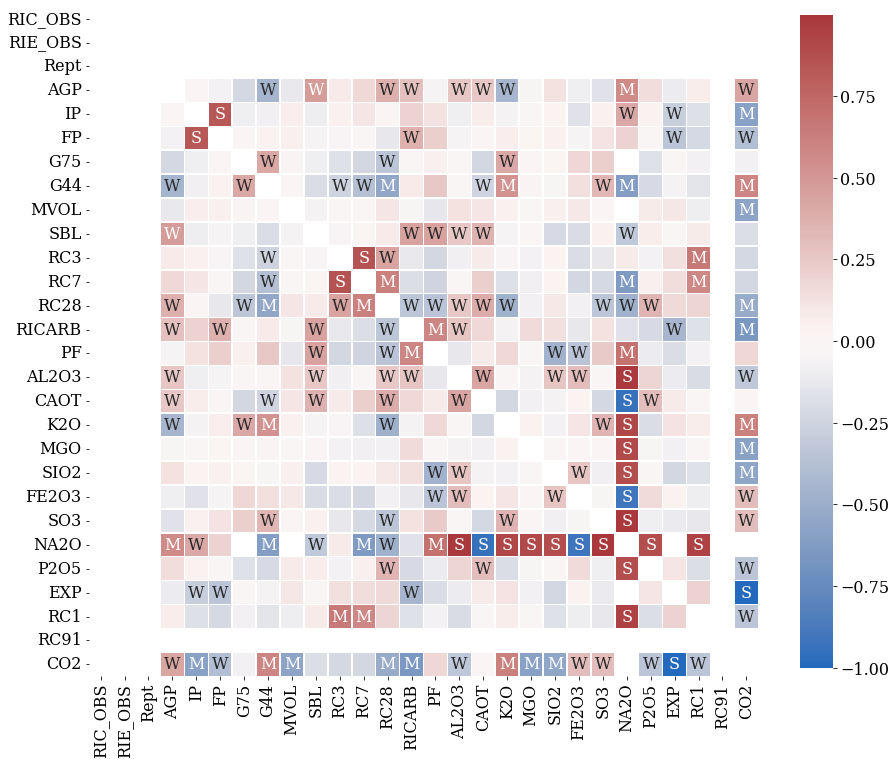

In [32]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

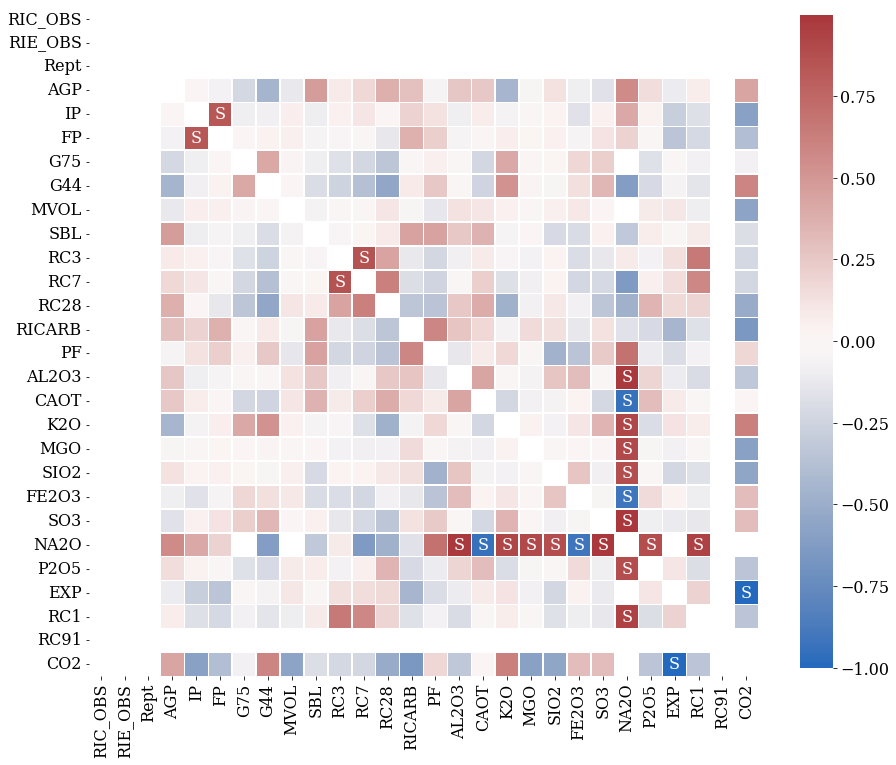

In [33]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) >= 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

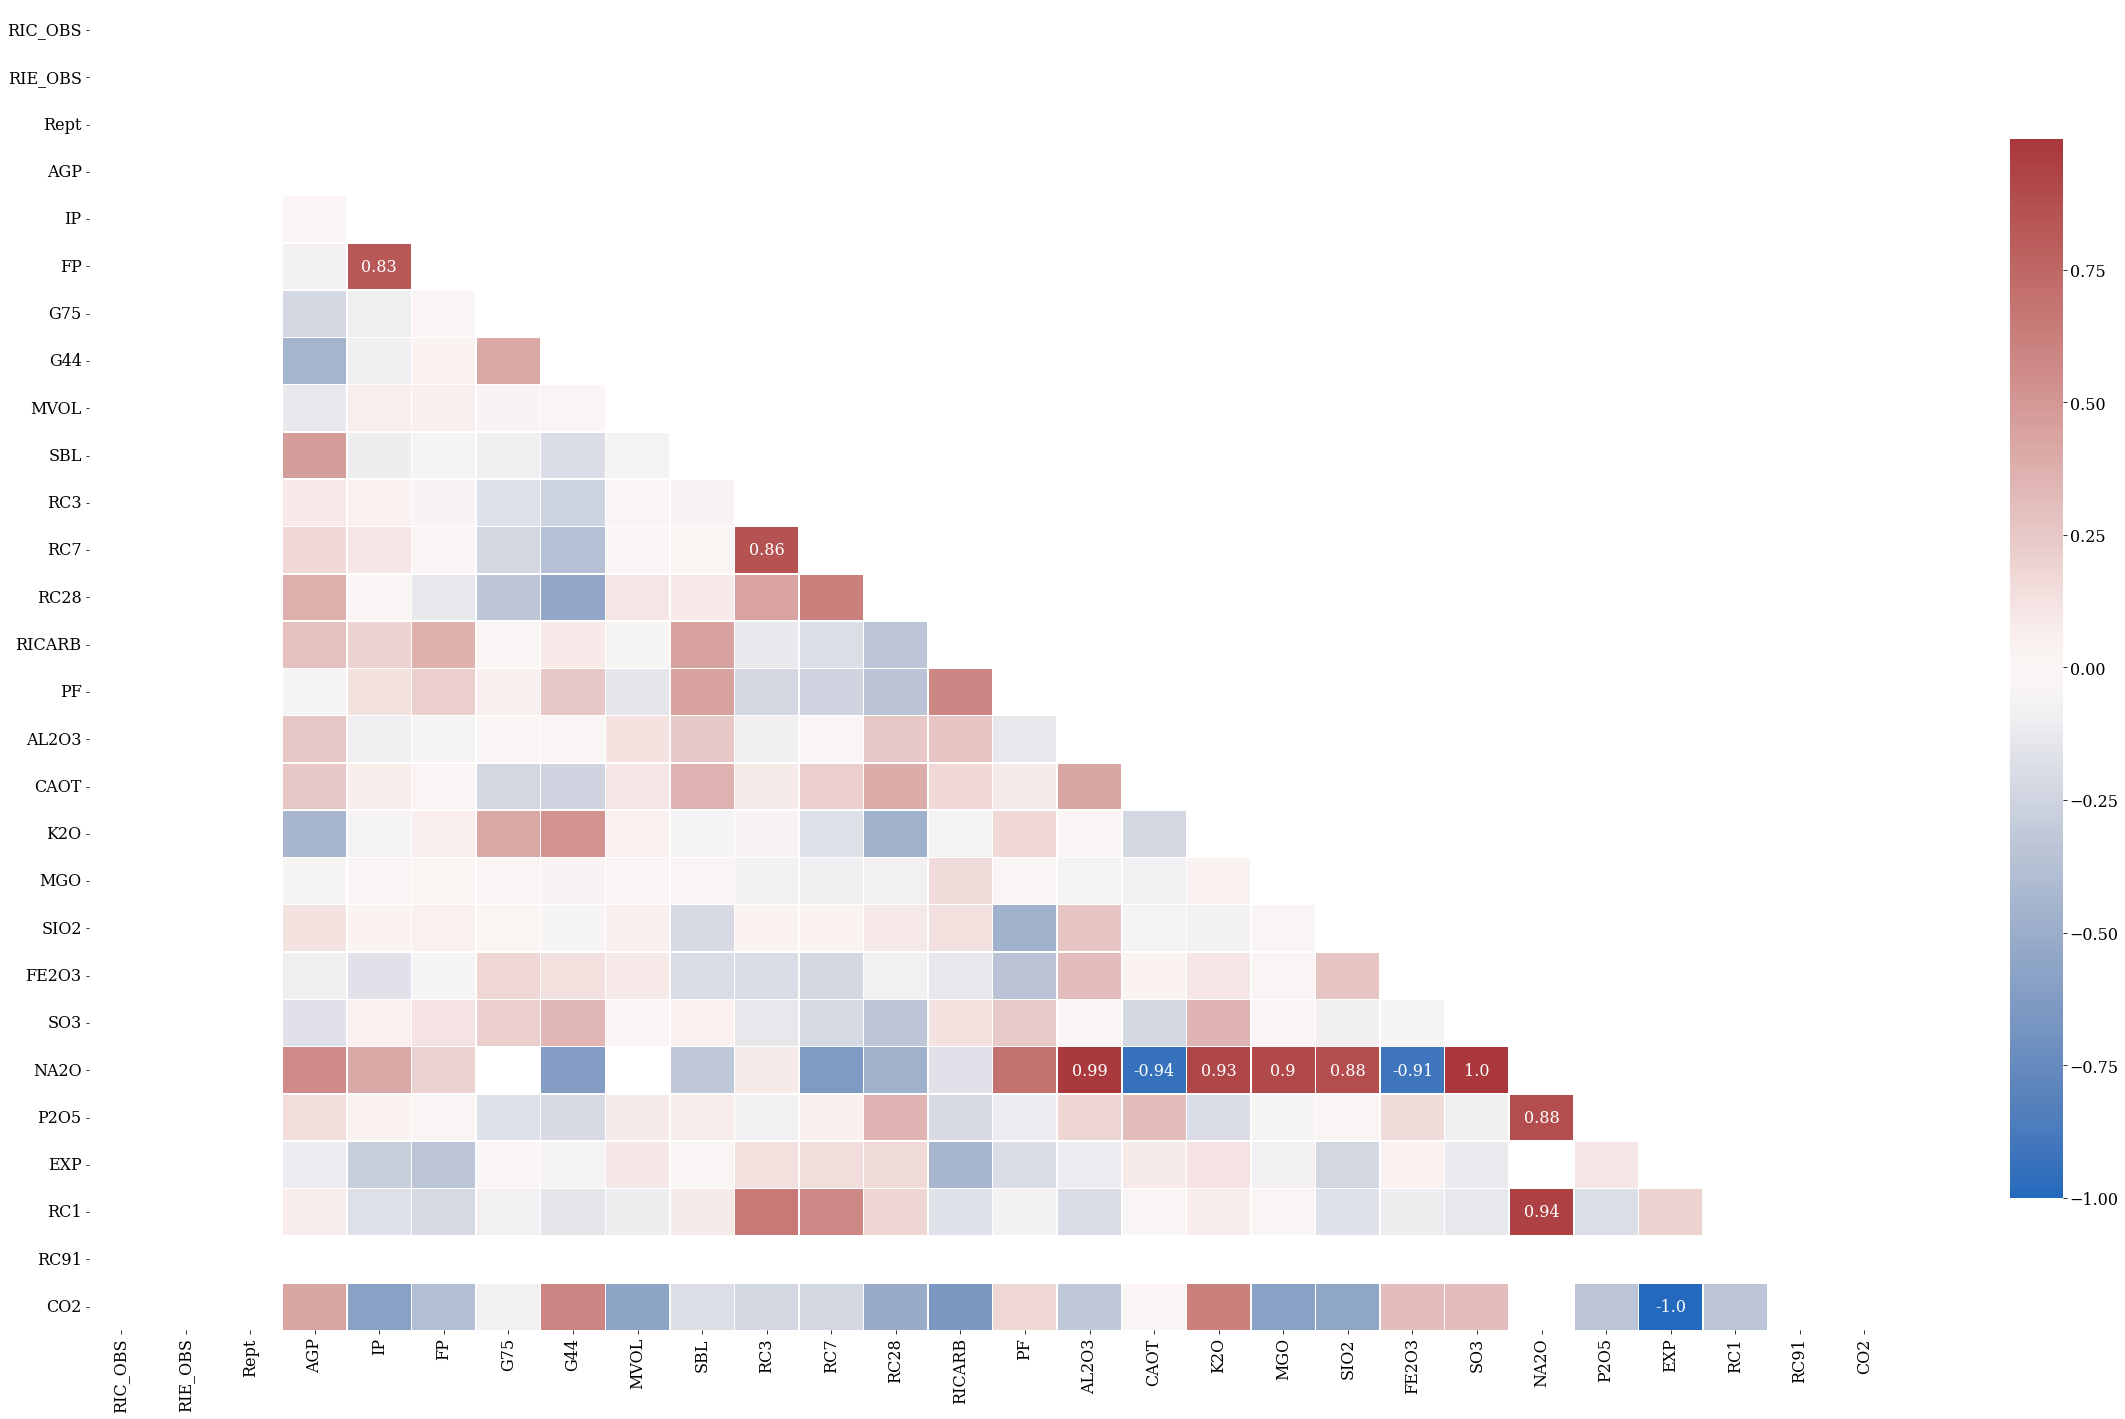

In [34]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 20))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [35]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

EXP    CO2     1.000000
SO3    NA2O    0.996672
AL2O3  NA2O    0.985020
CAOT   NA2O    0.944403
NA2O   RC1     0.943234
K2O    NA2O    0.925773
FE2O3  NA2O    0.906916
MGO    NA2O    0.904325
NA2O   P2O5    0.881394
SIO2   NA2O    0.881085
RC3    RC7     0.863266
IP     FP      0.832933
dtype: float64

In [36]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

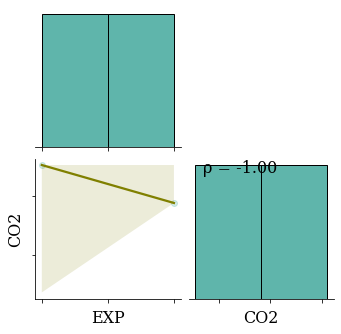

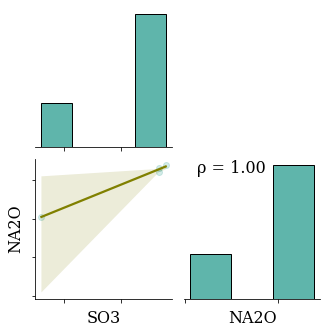

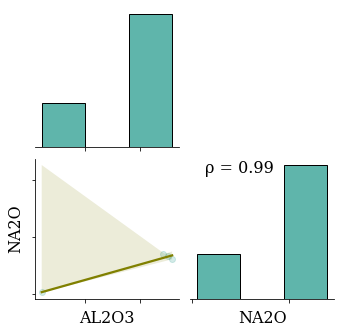

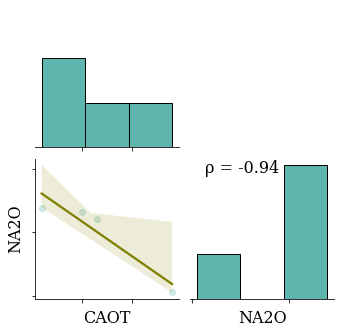

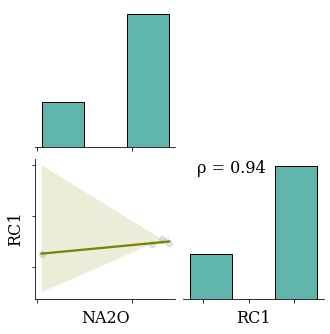

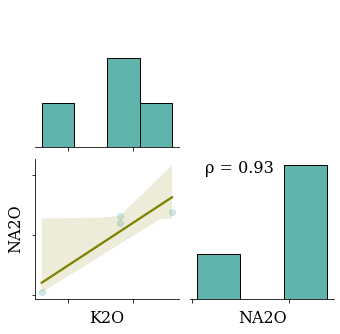

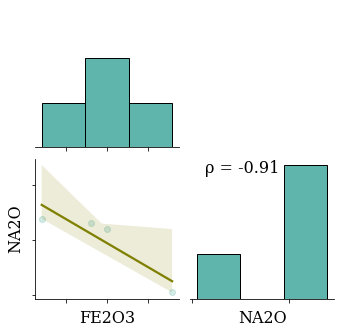

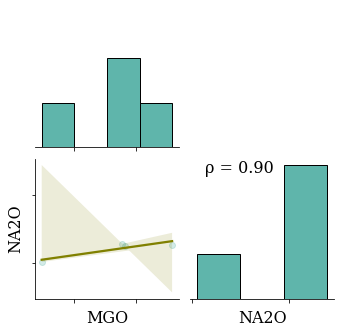

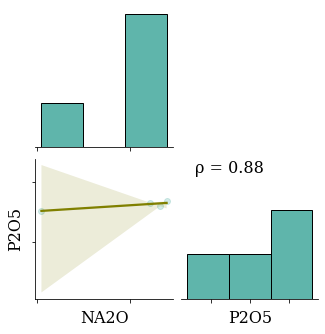

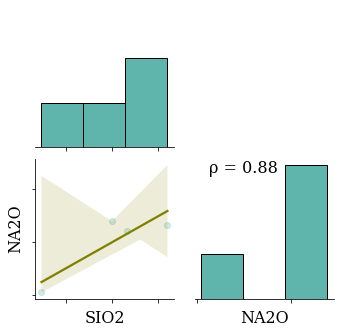

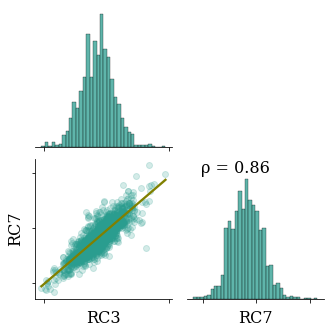

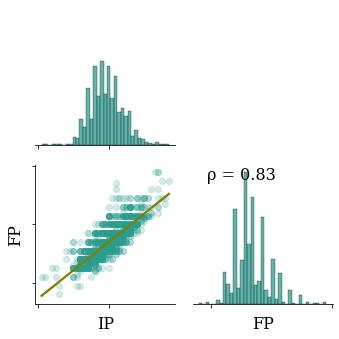

In [37]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [38]:
dates

0      2012-06-14
1      2012-06-15
2      2012-06-18
3      2012-06-19
4      2012-06-20
          ...    
1789   2019-07-24
1790   2019-07-26
1791   2019-07-29
1792   2019-07-30
1793   2019-07-31
Name: Data, Length: 1794, dtype: datetime64[ns]

In [39]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

1694 valid days out of 1740


In [40]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2016, 2017, 2018, 2019, 2012, 2013, 2014, 2015}


In [41]:
months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2016: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2017: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2018: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2019: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2012: {6, 7, 8, 9, 10, 11, 12},
 2013: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2014: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2015: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

In [42]:
days_each_month_per_year = {}
for year in years:
    for month in months_each_year[year]:
        days_each_month_per_year[str(year) + "-" + str(month)] = [
            date.day for date in dates if date.year == year and date.month == month
        ]

print("Days of available data for each month each year:")
days_each_month_per_year

Days of available data for each month each year:


{'2016-1': [4,
  5,
  6,
  7,
  8,
  11,
  12,
  13,
  14,
  15,
  18,
  19,
  20,
  21,
  22,
  25,
  26,
  27,
  28,
  29],
 '2016-2': [1,
  2,
  3,
  4,
  5,
  10,
  11,
  12,
  15,
  16,
  17,
  18,
  19,
  22,
  23,
  24,
  25,
  26,
  29],
 '2016-3': [1,
  2,
  3,
  4,
  7,
  8,
  9,
  10,
  11,
  14,
  15,
  16,
  17,
  18,
  21,
  22,
  23,
  24,
  28,
  29,
  30,
  31],
 '2016-4': [1,
  4,
  5,
  6,
  7,
  8,
  11,
  12,
  13,
  14,
  15,
  18,
  19,
  20,
  25,
  26,
  27,
  28,
  29],
 '2016-5': [2,
  3,
  4,
  5,
  6,
  9,
  10,
  11,
  12,
  13,
  16,
  17,
  18,
  19,
  20,
  23,
  24,
  25,
  27,
  30,
  31],
 '2016-6': [1,
  2,
  3,
  6,
  7,
  8,
  9,
  10,
  14,
  15,
  16,
  17,
  20,
  21,
  22,
  23,
  24,
  27,
  27,
  28,
  29,
  30],
 '2016-7': [1,
  4,
  5,
  6,
  7,
  8,
  11,
  12,
  13,
  14,
  15,
  18,
  19,
  20,
  21,
  22,
  25,
  26,
  27,
  28,
  29],
 '2016-8': [1,
  2,
  3,
  4,
  5,
  8,
  9,
  10,
  11,
  12,
  15,
  16,
  17,
  18,
  19,
  22,
  

In [43]:
# count of days each month per year
count_of_days_each_month_per_year = {}

for year_month, days in days_each_month_per_year.items():
    count_of_days_each_month_per_year[year_month] = len(days)

print("Count of days each month per year:")
count_of_days_each_month_per_year

Count of days each month per year:


{'2016-1': 20,
 '2016-2': 19,
 '2016-3': 22,
 '2016-4': 19,
 '2016-5': 21,
 '2016-6': 22,
 '2016-7': 21,
 '2016-8': 23,
 '2016-9': 22,
 '2016-10': 21,
 '2016-11': 23,
 '2016-12': 22,
 '2017-1': 23,
 '2017-2': 20,
 '2017-3': 23,
 '2017-4': 20,
 '2017-5': 24,
 '2017-6': 22,
 '2017-7': 22,
 '2017-8': 24,
 '2017-9': 20,
 '2017-10': 21,
 '2017-11': 21,
 '2017-12': 19,
 '2018-1': 21,
 '2018-2': 22,
 '2018-3': 22,
 '2018-4': 19,
 '2018-5': 18,
 '2018-6': 22,
 '2018-7': 21,
 '2018-8': 24,
 '2018-9': 18,
 '2018-10': 20,
 '2018-11': 22,
 '2018-12': 21,
 '2019-1': 17,
 '2019-2': 16,
 '2019-3': 18,
 '2019-4': 17,
 '2019-5': 17,
 '2019-6': 9,
 '2019-7': 16,
 '2019-8': 5,
 '2019-9': 4,
 '2019-10': 4,
 '2019-11': 5,
 '2019-12': 4,
 '2012-6': 12,
 '2012-7': 21,
 '2012-8': 25,
 '2012-9': 21,
 '2012-10': 22,
 '2012-11': 20,
 '2012-12': 18,
 '2013-1': 21,
 '2013-2': 19,
 '2013-3': 20,
 '2013-4': 24,
 '2013-5': 21,
 '2013-6': 19,
 '2013-7': 23,
 '2013-8': 21,
 '2013-9': 20,
 '2013-10': 26,
 '2013-11': 20,

In [44]:
max_obs_key = max(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
max_obs_value = count_of_days_each_month_per_year[max_obs_key]
min_obs_key = min(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
min_obs_value = count_of_days_each_month_per_year[min_obs_key]
print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2019-9 has the minimum number of days with samples - 4
2013-10 has the maximum number of days with samples - 26


In [45]:
mean_obs_per_year = {str(year) : 0 for year in years}

for year, value in count_of_days_each_month_per_year.items():
    mean_obs_per_year[year[:4]] += value

for year, value in months_each_year.items():
    mean_obs_per_year[str(year)] /= len(value)
    mean_obs_per_year[str(year)] = int(mean_obs_per_year[str(year)])
    
print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(np.mean(list(count_of_days_each_month_per_year.values()))))

Mean Number of observations - per year
{'2016': 21, '2017': 21, '2018': 20, '2019': 11, '2012': 19, '2013': 21, '2014': 21, '2015': 20}

Mean number of observations - all years
19


In [46]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i-1])
diffs

[Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('4 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedel

In [47]:
# Average Frequency
np.mean(diffs)

Timedelta('1 days 10:50:31.790295593')

In [48]:
Counter(diffs)

Counter({Timedelta('1 days 00:00:00'): 1204,
         Timedelta('3 days 00:00:00'): 283,
         Timedelta('4 days 00:00:00'): 29,
         Timedelta('0 days 00:00:00'): 54,
         Timedelta('2 days 00:00:00'): 41,
         Timedelta('5 days 00:00:00'): 11,
         Timedelta('7 days 00:00:00'): 2,
         Timedelta('34 days 00:00:00'): 1,
         Timedelta('28 days 00:00:00'): 10,
         Timedelta('31 days 00:00:00'): 55,
         Timedelta('30 days 00:00:00'): 37,
         Timedelta('92 days 00:00:00'): 12,
         Timedelta('-320 days +00:00:00'): 1,
         Timedelta('-29 days +00:00:00'): 2,
         Timedelta('89 days 00:00:00'): 2,
         Timedelta('91 days 00:00:00'): 4,
         Timedelta('-291 days +00:00:00'): 2,
         Timedelta('-56 days +00:00:00'): 3,
         Timedelta('-265 days +00:00:00'): 2,
         Timedelta('-54 days +00:00:00'): 1,
         Timedelta('122 days 00:00:00'): 1,
         Timedelta('-235 days +00:00:00'): 1,
         Timedelta('-115 days

<AxesSubplot:xlabel='count'>

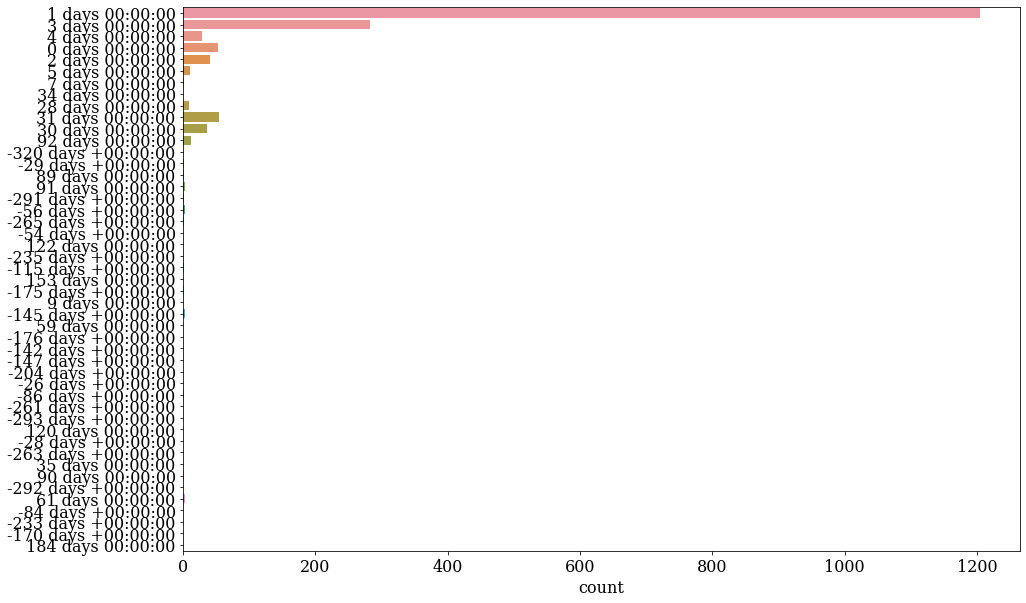

In [49]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [50]:
# Same thing but only with the dates

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i].date() - dates[i-1].date())

In [51]:
# Average Frequency
np.mean(diffs)

datetime.timedelta(1, 39031, 790296)

In [52]:
Counter(diffs)

Counter({datetime.timedelta(1): 1204,
         datetime.timedelta(3): 283,
         datetime.timedelta(4): 29,
         datetime.timedelta(0): 54,
         datetime.timedelta(2): 41,
         datetime.timedelta(5): 11,
         datetime.timedelta(7): 2,
         datetime.timedelta(34): 1,
         datetime.timedelta(28): 10,
         datetime.timedelta(31): 55,
         datetime.timedelta(30): 37,
         datetime.timedelta(92): 12,
         datetime.timedelta(-320): 1,
         datetime.timedelta(-29): 2,
         datetime.timedelta(89): 2,
         datetime.timedelta(91): 4,
         datetime.timedelta(-291): 2,
         datetime.timedelta(-56): 3,
         datetime.timedelta(-265): 2,
         datetime.timedelta(-54): 1,
         datetime.timedelta(122): 1,
         datetime.timedelta(-235): 1,
         datetime.timedelta(-115): 2,
         datetime.timedelta(153): 1,
         datetime.timedelta(-175): 2,
         datetime.timedelta(9): 1,
         datetime.timedelta(-145): 4,
    

In [53]:
# percent of diffs
[round(val/df.shape[0] *100, 2) for val in list(Counter(diffs).values())]

[67.11,
 15.77,
 1.62,
 3.01,
 2.29,
 0.61,
 0.11,
 0.06,
 0.56,
 3.07,
 2.06,
 0.67,
 0.06,
 0.11,
 0.11,
 0.22,
 0.11,
 0.17,
 0.11,
 0.06,
 0.06,
 0.06,
 0.11,
 0.06,
 0.11,
 0.06,
 0.22,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.11,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.11,
 0.06,
 0.22,
 0.06,
 0.06,
 0.06,
 0.06]

<AxesSubplot:xlabel='count'>

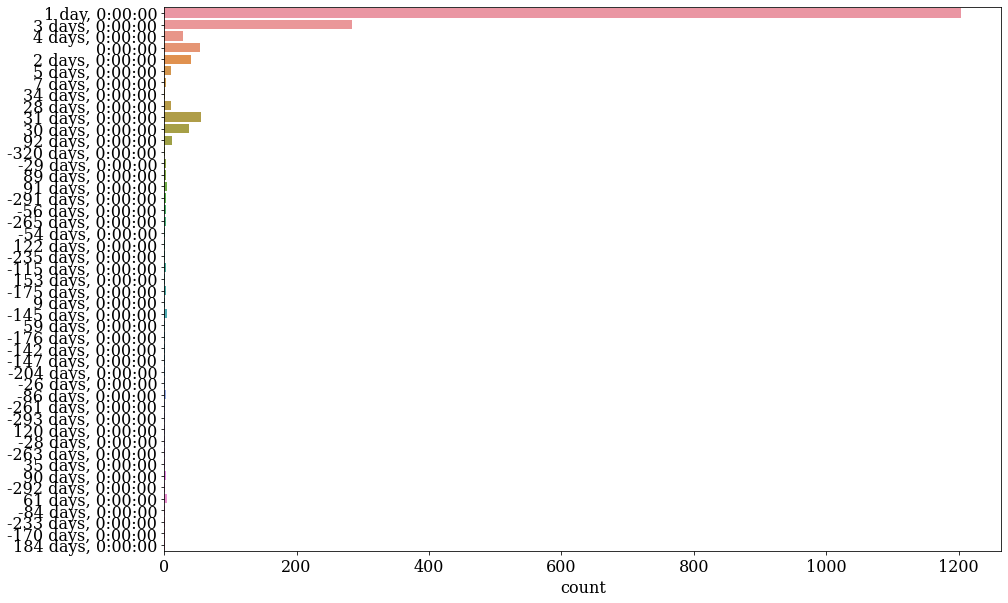

In [54]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y= diffs)

### Compressive Strength Distribution

#### 1 Days

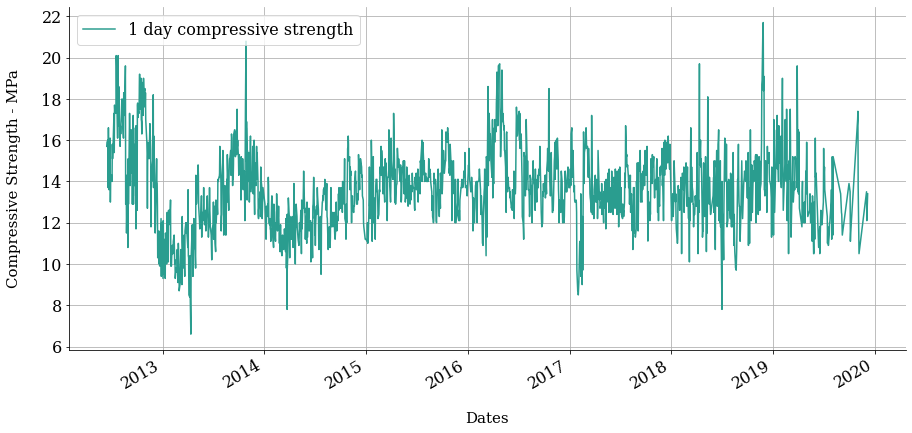

In [55]:
tmp = df[["Data", "RC1"]].dropna().copy()
tmp = tmp.set_index("Data")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### 3 Days

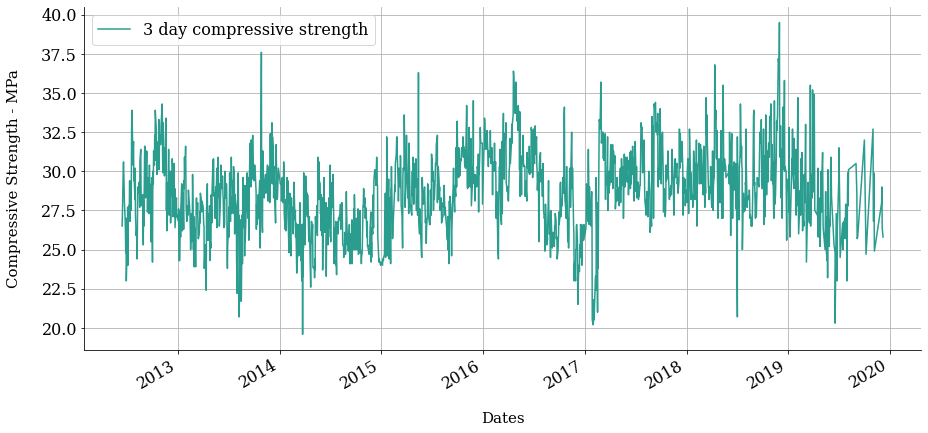

In [56]:
tmp = df[["Data", "RC3"]].dropna().copy()
tmp = tmp.set_index("Data")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### 7 Days

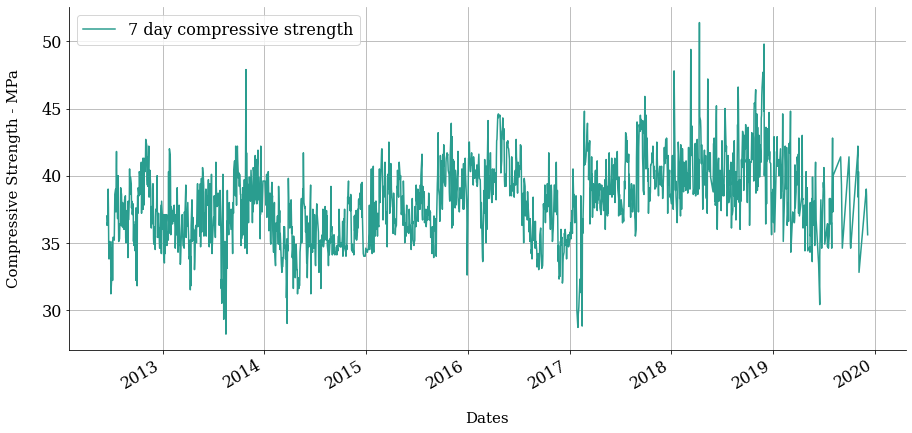

In [57]:
tmp = df[["Data", "RC7"]].dropna().copy()
tmp = tmp.set_index("Data")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### 28 Days

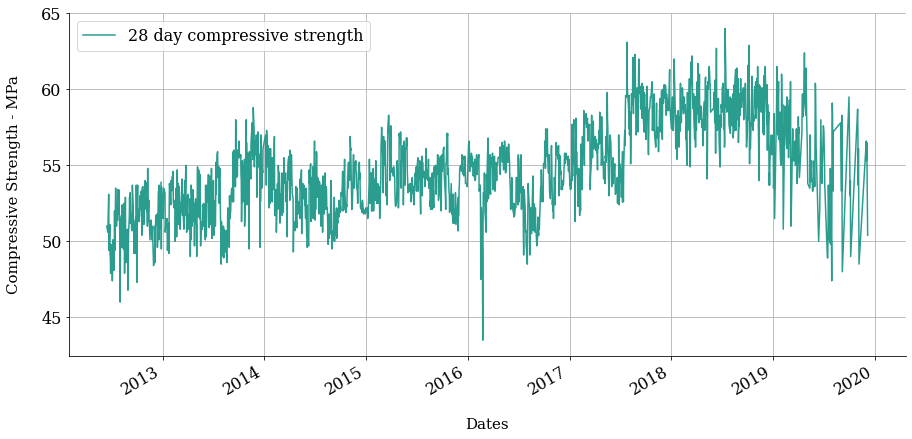

In [58]:
tmp = df[["Data", "RC28"]].dropna().copy()
tmp = tmp.set_index("Data")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          1794 non-null   datetime64[ns]
 1   RIC           1794 non-null   object        
 2   RIC_OBS       0 non-null      float64       
 3   Nat           1794 non-null   object        
 4   Nat1          2 non-null      object        
 5   Lp            1794 non-null   object        
 6   Ec            1794 non-null   object        
 7   Lc            1794 non-null   object        
 8   RIE           1794 non-null   object        
 9   RIE_OBS       0 non-null      float64       
 10  Rept          0 non-null      float64       
 11  COD_MN        1794 non-null   object        
 12  COD_ENT       1794 non-null   object        
 13  COD_PROD      1794 non-null   object        
 14  COD_VAR_PROD  1787 non-null   object        
 15  AGP           1791 non-null   float64 